In [1]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 13.3 MB/s 
     |████████████████████████████████| 9.9 MB 58.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
import math

import torch
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

from tqdm import tqdm

import pmdarima.arima as pmd
from pmdarima import model_selection
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.api import qqplot
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error

from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [3]:
!cp "/content/drive/MyDrive/KLEEMANN/2_year_samples.xlsx" "/content"

In [4]:
# Define xlsx filename
filename = "/content/2_year_samples.xlsx"
# Read the .xlsx
df = pd.read_excel(filename, nrows=50000)
# Drop columns that we don't need
df_cleaned = df.drop(df.columns[[0, 7]],axis = 1)
# Set Dataframe's dtype to float32
df_cleaned = df_cleaned.astype(np.float32)
print(df_cleaned.shape)
df_cleaned.head()

(50000, 6)


,SPEED UP,NOISE UP,PRESSURE UP,SPEED DOWN,NOISE DOWN,PRESSURE DOWN
0,0.0,51.049999,15.66,0.00,56.360001,17.17
1,0.0,51.049999,15.66,0.00,56.099998,16.68
2,0.0,51.189999,15.66,0.00,55.939999,16.68
3,0.0,52.139999,15.66,0.00,55.939999,15.29
4,0.0,52.139999,15.66,0.07,55.869999,15.29


In [5]:
feature_types = ['SPEED UP', 'NOISE UP', 'PRESSURE UP', 'SPEED DOWN', 'NOISE DOWN', 'PRESSURE DOWN']

In [6]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print(f"\n1.ADF: {dftest[0]}")
    print(f"2.P-Value: {dftest[1]}")
    print(f"3.Num of Lags: {dftest[2]}")
    print(f"4.Num of observations used for ADF Regression and Critical values calculation: {dftest[3]}")
    print(f"5.Critical values: {dftest[4]}")
    for key, val in dftest[4].items():
        print(f"\t{key}: {val}")
    print()


 ############## SPEED UP ##############



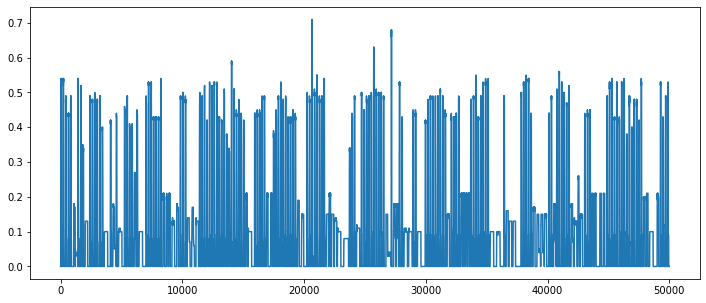


1.ADF: -29.04819027150503
2.P-Value: 0.0
3.Num of Lags: 57
4.Num of observations used for ADF Regression and Critical values calculation: 49942
5.Critical values: {'1%': -3.430480944618592, '5%': -2.8615978748306916, '10%': -2.566800804858541}
	1%: -3.430480944618592
	5%: -2.8615978748306916
	10%: -2.566800804858541



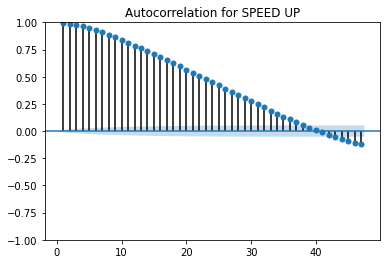

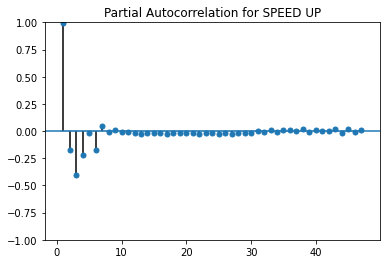

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-263382.884, Time=45.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-45917.812, Time=4.52 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=3.36 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-102794.726, Time=11.91 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-28551.831, Time=1.42 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-259250.800, Time=33.90 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-252372.090, Time=63.04 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-263851.129, Time=52.06 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-262417.630, Time=53.85 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-258490.828, Time=109.77 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-263557.569, Time=70.53 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-263020.489, Time=42.53 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-263688.233, Time=64.91 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=-265046.522, Time

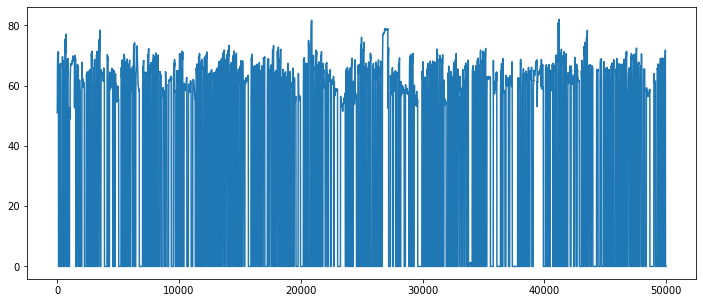


1.ADF: -27.589361306565095
2.P-Value: 0.0
3.Num of Lags: 57
4.Num of observations used for ADF Regression and Critical values calculation: 49942
5.Critical values: {'1%': -3.430480944618592, '5%': -2.8615978748306916, '10%': -2.566800804858541}
	1%: -3.430480944618592
	5%: -2.8615978748306916
	10%: -2.566800804858541



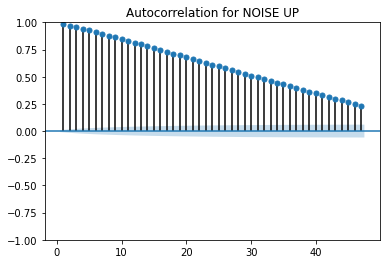

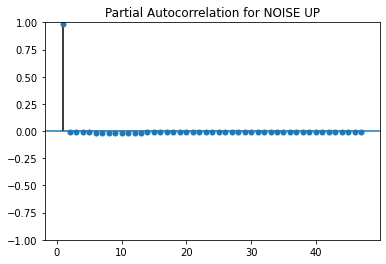

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=280866.886, Time=24.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=439469.707, Time=0.81 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=280863.918, Time=1.77 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=387555.784, Time=8.87 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=473423.433, Time=0.39 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=280863.073, Time=2.72 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=280861.105, Time=3.51 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=280857.210, Time=4.41 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=280852.114, Time=5.32 sec
 ARIMA(6,0,0)(0,0,0)[0] intercept   : AIC=280844.312, Time=7.35 sec
 ARIMA(7,0,0)(0,0,0)[0] intercept   : AIC=280837.544, Time=8.63 sec
 ARIMA(8,0,0)(0,0,0)[0] intercept   : AIC=280829.379, Time=9.63 sec
 ARIMA(9,0,0)(0,0,0)[0] intercept   : AIC=280821.981, Time=11.29 sec
 ARIMA(10,0,0)(0,0,0)[0] intercept   : AIC=280815.157, Time=12.67 sec
 

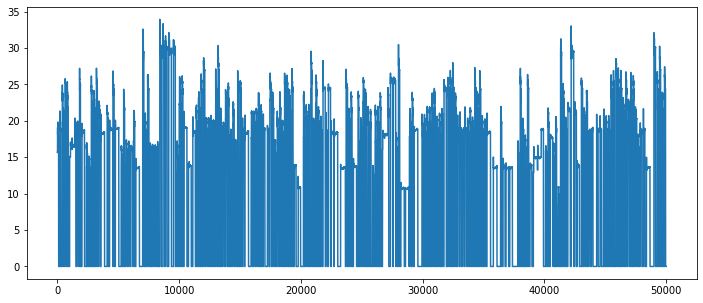


1.ADF: -28.228190236300293
2.P-Value: 0.0
3.Num of Lags: 57
4.Num of observations used for ADF Regression and Critical values calculation: 49942
5.Critical values: {'1%': -3.430480944618592, '5%': -2.8615978748306916, '10%': -2.566800804858541}
	1%: -3.430480944618592
	5%: -2.8615978748306916
	10%: -2.566800804858541



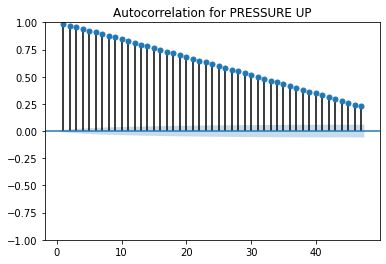

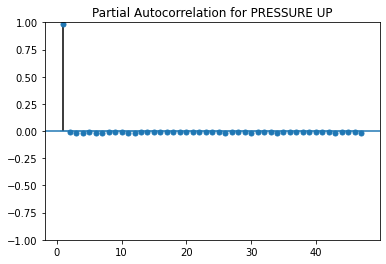

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=179162.494, Time=5.98 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=179157.786, Time=0.87 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=179159.090, Time=2.29 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=179159.101, Time=2.79 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=179155.788, Time=0.42 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=28.43 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 40.807 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                45000
Model:               SARIMAX(0, 1, 0)   Log Likelihood              -89576.894
Date:                Fri, 09 Dec 2022   AIC                         179155.788
Time:                        14:57:49   BIC                         179164.503
Sample:                             0   HQIC                        179158.531
   

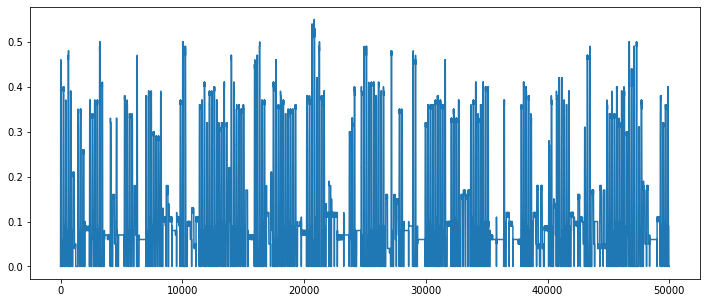


1.ADF: -28.092558718813592
2.P-Value: 0.0
3.Num of Lags: 56
4.Num of observations used for ADF Regression and Critical values calculation: 49943
5.Critical values: {'1%': -3.430480941996576, '5%': -2.86159787367184, '10%': -2.566800804241718}
	1%: -3.430480941996576
	5%: -2.86159787367184
	10%: -2.566800804241718



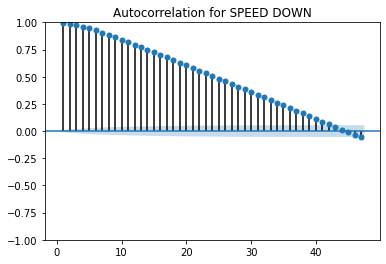

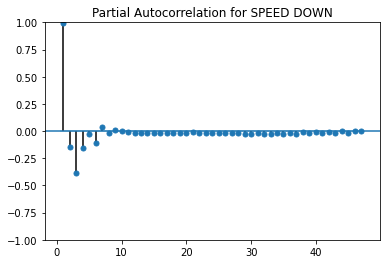

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-271064.016, Time=32.25 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-60979.079, Time=5.23 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=8.53 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-116812.010, Time=13.26 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-35718.084, Time=1.21 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-268814.751, Time=33.19 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-262471.854, Time=59.06 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-271890.933, Time=20.27 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-271017.270, Time=53.58 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-267231.192, Time=111.90 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-271800.236, Time=45.80 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-271628.983, Time=78.83 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-271718.888, Time=48.25 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=-272175.052, Time

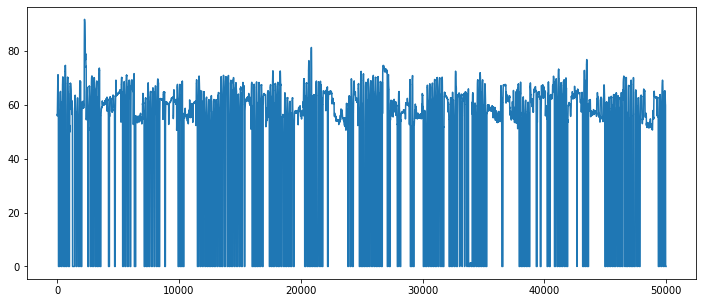


1.ADF: -27.04186676066623
2.P-Value: 0.0
3.Num of Lags: 57
4.Num of observations used for ADF Regression and Critical values calculation: 49942
5.Critical values: {'1%': -3.430480944618592, '5%': -2.8615978748306916, '10%': -2.566800804858541}
	1%: -3.430480944618592
	5%: -2.8615978748306916
	10%: -2.566800804858541



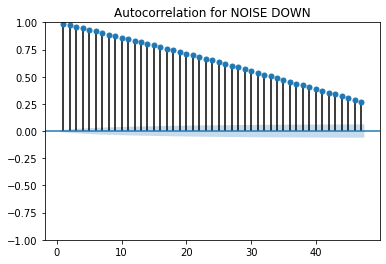

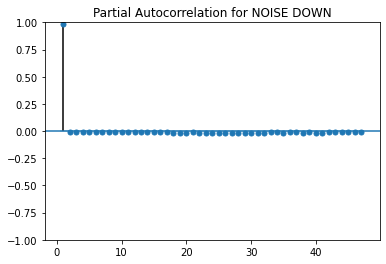

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=267969.971, Time=8.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=267962.200, Time=0.89 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=267964.108, Time=1.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=267964.108, Time=2.41 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=267960.203, Time=0.44 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=267966.107, Time=2.80 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 16.082 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                45000
Model:               SARIMAX(0, 1, 0)   Log Likelihood             -133979.102
Date:                Fri, 09 Dec 2022   AIC                         267960.203
Time:                        15:29:38   BIC                         267968.918
Sample:                             0   HQIC                        267962.9

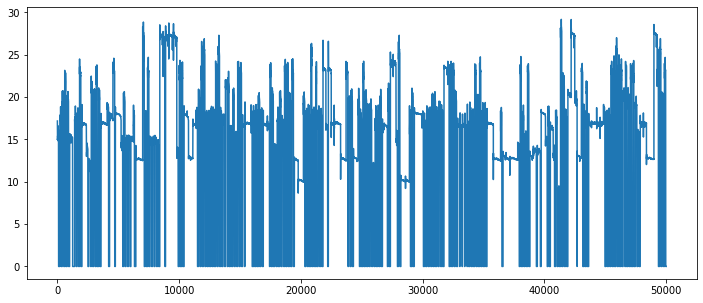


1.ADF: -25.011229178448076
2.P-Value: 0.0
3.Num of Lags: 57
4.Num of observations used for ADF Regression and Critical values calculation: 49942
5.Critical values: {'1%': -3.430480944618592, '5%': -2.8615978748306916, '10%': -2.566800804858541}
	1%: -3.430480944618592
	5%: -2.8615978748306916
	10%: -2.566800804858541



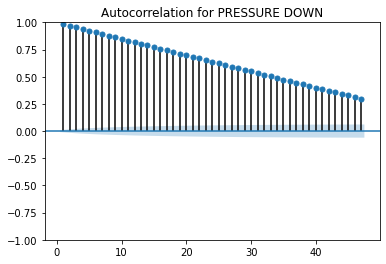

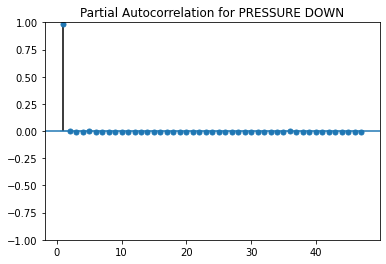

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=167622.890, Time=5.90 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=167622.663, Time=0.91 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=167617.019, Time=2.30 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=167617.021, Time=2.79 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=167620.665, Time=0.52 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=167619.019, Time=3.64 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=167619.019, Time=3.62 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=167620.387, Time=8.83 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=167615.022, Time=0.71 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=167617.021, Time=0.96 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=167617.021, Time=1.02 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=167615.024, Time=0.80 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=167618.388, Time=1.31 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 33.331 sec

In [7]:
with open(f"tsa_logs.txt",'w',encoding = 'utf-8') as f:
    for feature in feature_types:
        
        print(f"\n ############## {feature} ##############\n")

        plt.figure(figsize=(12,5))
        plt.plot(df_cleaned.index, df_cleaned[feature])
        plt.show()

        ad_test(df_cleaned[feature])

        # split into training and testing data
        to_row = int(len(df_cleaned)*0.9)
        training_data, testing_data = model_selection.train_test_split(df_cleaned[feature], train_size=int(9 * df_cleaned[feature].shape[0] / 10))

        sm.graphics.tsa.plot_acf(training_data, zero=False)
        plt.title(f"Autocorrelation for {feature}")        
        plt.show()

        sm.graphics.tsa.plot_pacf(training_data, zero=False)
        plt.title(f"Partial Autocorrelation for {feature}")        
        plt.show()

        model = auto_arima(training_data, max_p=15, max_q=15, trace=True, supress_warnings=True)
        print(model.summary())
                